In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install statsmodels
import statsmodels.tsa.stattools as ts
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error




In [9]:

# Define the path to your CSV file
file_path = ('/content/exchange_rate.csv')

# Read the CSV file, parse dates and set 'date' as the index
data = pd.read_csv('/content/exchange_rate.csv', parse_dates=['date'], index_col='date')

In [10]:
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [11]:
print(df.head())

               date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849


In [12]:
print(df.tail())

                  date   Ex_rate
7583  06-10-2010 00:00  0.718494
7584  07-10-2010 00:00  0.721839
7585  08-10-2010 00:00  0.723197
7586  09-10-2010 00:00  0.720825
7587  10-10-2010 00:00  0.720825


In [13]:
print(df.describe())

           Ex_rate
count  7588.000000
mean      0.776974
std       0.136620
min       0.483297
25%       0.701422
50%       0.761377
75%       0.873477
max       1.102536


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB
None


In [15]:
print(df.dtypes)

date        object
Ex_rate    float64
dtype: object


In [17]:
print(df.columns)

Index(['date', 'Ex_rate'], dtype='object')


In [18]:
print(df.shape)

(7588, 2)


In [19]:
#Missing values
print(df.isnull().sum())

date       0
Ex_rate    0
dtype: int64


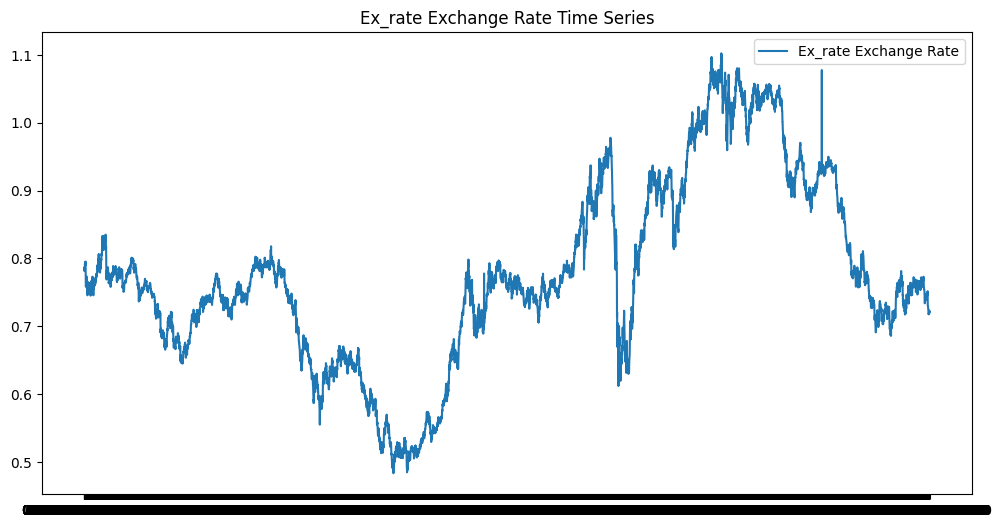

In [23]:
#initial exploration
currency = 'Ex_rate'
series = data[currency]
plt.figure(figsize=(12, 6))
plt.plot(series, label=f'{currency} Exchange Rate')
plt.title(f'{currency} Exchange Rate Time Series')
plt.legend()
plt.show()

In [27]:
# Check for stationarity
result = ts.adfuller(series.dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -1.6649941807382342
p-value: 0.4492327353597477


In [28]:
# Differencing if necessary
if result[1] > 0.05:
    series_diff = series.diff().dropna()
else:
    series_diff = series

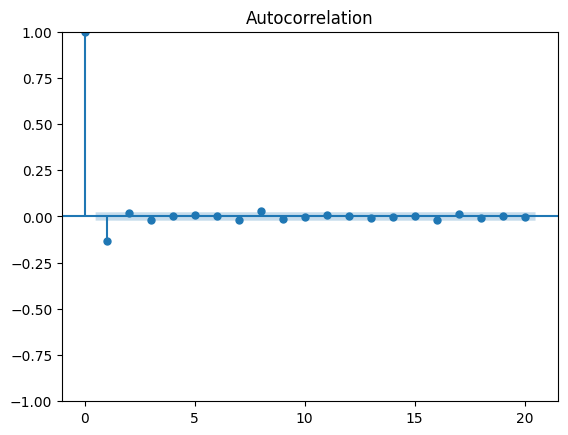

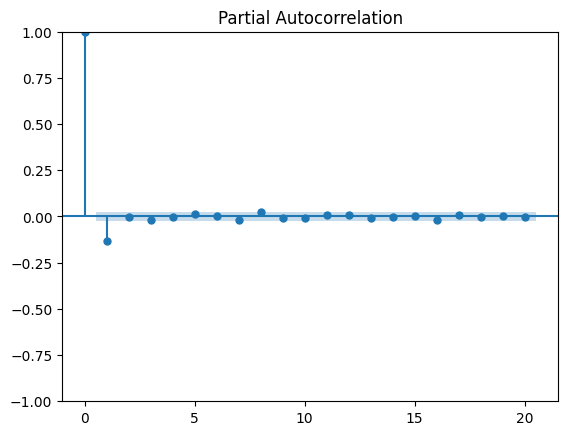

In [32]:
# Plot ACF and PACF
plot_acf(series_diff, lags=20)
plt.show()
plot_pacf(series_diff, lags=20)
plt.show()

In [42]:
#Arima model fitting
p = 1
q = 1
d =  1

In [43]:
model = ARIMA(series, order=(p, d, q))
arima_result = model.fit()

In [45]:

print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Mon, 30 Dec 2024   AIC                         -56102.322
Time:                        13:51:33   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

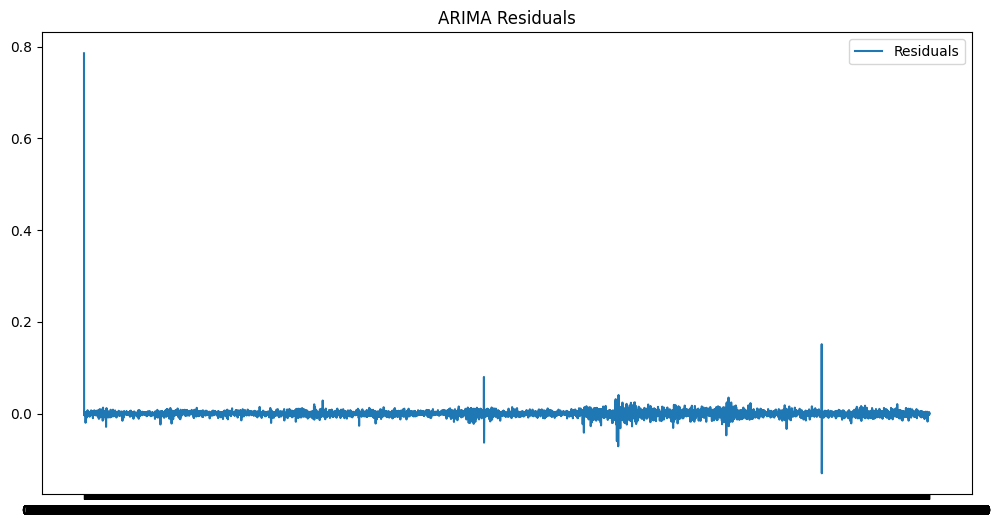

In [46]:
# Diagnostics and forecasting
residuals = arima_result.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.title('ARIMA Residuals')
plt.legend()
plt.show()

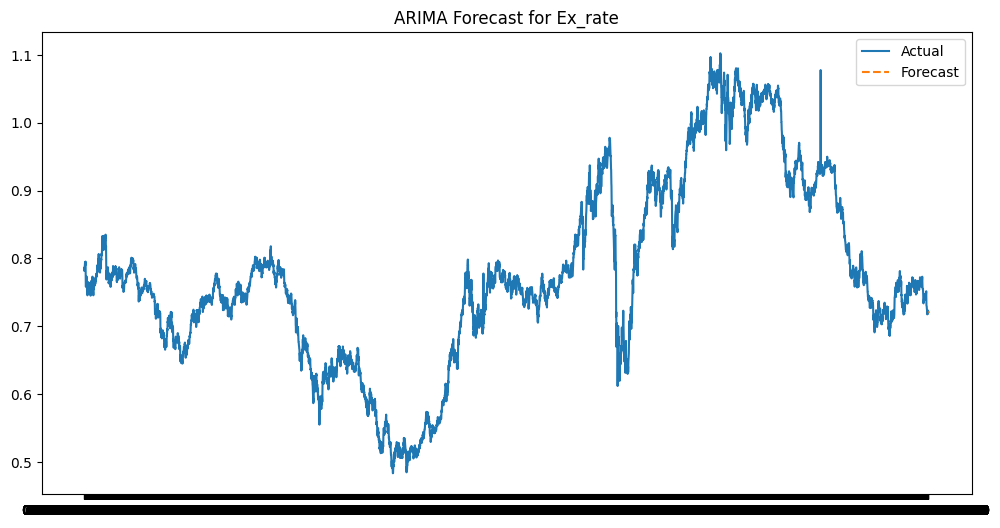

In [47]:
forecast = arima_result.forecast(steps=12)
plt.figure(figsize=(12, 6))
plt.plot(series, label='Actual')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title(f'ARIMA Forecast for {currency}')
plt.legend()
plt.show()

In [50]:
# Exponential Smoothing
model_es = ExponentialSmoothing(series, trend='add', seasonal='add', seasonal_periods=12)
es_result = model_es.fit()
forecast_es = es_result.forecast(steps=12)


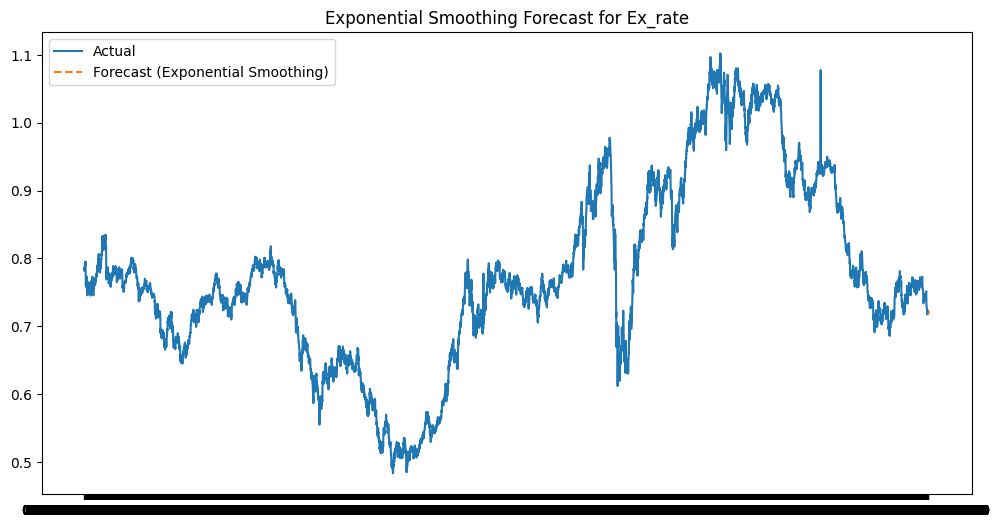

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(series, label='Actual')
plt.plot(forecast_es, label='Forecast (Exponential Smoothing)', linestyle='--')
plt.title(f'Exponential Smoothing Forecast for {currency}')
plt.legend()
plt.show()


In [52]:
# Evaluation metrics
actual = series[-12:]  # Replace with test data if splitting
forecast_arima = arima_result.forecast(steps=len(actual))
forecast_es = es_result.forecast(steps=len(actual))

In [55]:
mae_arima = mean_absolute_error(actual, forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(actual, forecast_arima))

In [56]:
mae_es = mean_absolute_error(actual, forecast_es)
rmse_es = np.sqrt(mean_squared_error(actual, forecast_es))

In [57]:
print("ARIMA Metrics - MAE:", mae_arima, "RMSE:", rmse_arima)
print("Exponential Smoothing Metrics - MAE:", mae_es, "RMSE:", rmse_es)

ARIMA Metrics - MAE: 0.001664492434046964 RMSE: 0.002000358073456273
Exponential Smoothing Metrics - MAE: 0.0015804343412773036 RMSE: 0.0018638340074147194


In [58]:
# Compare models
if mae_arima < mae_es:
    print("ARIMA performed better based on MAE.")
else:
    print("Exponential Smoothing performed better based on MAE.")

Exponential Smoothing performed better based on MAE.
